# COGS 118A - Final Project

# Income Classification on the US Census Data

# Group Members

* Antonio Aldama
* Jie(MJ) Mei
* Joshua Chen
* Janet Ruiz

# Abstract

Our project aims to train and test an algorithm to classify people with an annual income of less than or equal to 50k dollars and people with an annual income of more than 50k dollars. We will use census data collected in 1994 that contains categorical and continuous variables. First, we will clean our dataset and do exploratory data analysis using python libraries pandas and numpy. Then we will try different classification methods from SciKit-Learn (e.g. K Nearest neighbor, Support Vector Machine, Decision Tree) to find the best model possible. Finally, using a confusion matrix we will test the performance of each classification algorithm.

# Background

Societal inequalities and their implications are highlighted in censuses. Strmic-Pawl et al. note the need for “racial groups [to] be linked to tracking inequality” <a href="#source3"><sup id=”note3”>[1]</sup></a>. It is possible to investigate the relation between race and social disparities because the US, unlike many other countries, asks for racial information in its census. The importance of this income disparity is furthered given that there is a relationship between income distribution and health <a href="#source4"><sup id=”note4”>[2]</sup></a>. Ross used regression analyses to prove that populations with higher income inequality have higher mortality than more homogenous areas. The lower-income members are the ones likely to drive mortality rates upwards in these populations. Therefore, identifying the role of race in inequalities can help with better addressing these issues. 

Income inequality has been a prevalent problem in the United States. It is responsible for the income gaps among people of different races, genders, marital statuses, and occupations, etc. While the middle income population in America has decreased from 61% in 1971 to 51% in 2019, its shrinkage corresponds to the growth of the number of upper class households <a href="#source2"><sup id=”note2”>[3]</sup></a>. In addition, the growth of median middle class income from 1970 to 2018 is 49%, which is considerably less than the 64% counterpart of the upper class. On the other hand, the low income population remained relatively constant for the past 50 years. The high mobility between middle and upper class would not mitigate the perpetuating income gaps. As income gaps contribute to the discrepancies of purchasing power, they would consolidate the systematic economic inequality. Therefore, we are trying to evaluate which attributes in our dataset contribute to the discrepancy in annual incomes. 

According to the U.S. Census Bureau, the median income for Black households have significantly lagged other races while Asian households was the highest reported in 2020, while the poverty rates for Black and Hispanic were also higher compared to other races <a href="#source5"><sup id=”note5”>[4]</sup></a>. To combat this inequality, we aim to identify the other factors that contributed most to our prediction (other than race), and identify potential correlations between race + the other factor. This helps us determine what factors affect the inequality the most and would allow us to propose solutions to how we can combat this inequality. For example, if we found that education appears to be the factor that contributed most to our prediction, we can implement changes to the education system to help better combat income inequality.

Similar to the discrepancies with race, sex and gender can also affect income. Gomez-Cravioto et al. created a classification model to predict ‘current income’ based on ‘first income’ in alumni from various Mexican private universities. In their exploratory analysis they show that ‘gender’, ‘school’ (i.e. major), and ‘years worked foreign’ had the biggest effect on ‘current income’. When further comparing gender with ‘first income’ and ‘current income’ it shows that on average female alums make $3,151 and $26,845 less than male alums respectively <a href="#source6"><sup id=”note6”>[5]</sup></a>. Their results indicate that there exists a gender wage gap for university alums. Ultimately, even in populations that have completed higher education there is some form on inequity when it comes to gender and income. 

# Problem Statement

Income inequality in the United States is a significant issue. While top earners enjoy a disproportionately large amount of the country’s wealth, many others struggle to make ends meet. A person’s income can determine their standard of living, socioeconomic status, and, consequently, their access to resources and wellness. We aim to build a machine learning model that best predicts whether a person will make over/under 50k based on their age, education degree, marital status, and other variables. Being able to accurately classify whether a person makes over/under 50k is significant as finance, businesses, and policy makers can greatly benefit from it. In finance, the ability to accurately predict an individual’s income level can help financial institutions tailor their products and services to better serve their customers. In business marketing, this classification can help companies identify potential customers who are more likely to purchase their products, which will allow them to optimize their marketing strategies. In public policy, governments can use this classification to identify groups of individuals who may be at risk of poverty, allowing policymakers to design interventions to improve their financial conditions. Furthermore, through training the models, we will be able to find which variables contribute the most to the prediction, which provides insights as to how to combat income inequality. Furthermore, our problem is quantifiable because it could be expressed as f(x;w,b)={+1 if 1/(1+e-(wTx+b))>=0.5, -1 otherwise) in a logistic regression model. It is measurable because models could be evaluated by the confusion matrix metric based on the calculations of the recall and specificity rates. Last but not least, it is replicable because the dataset is publicly available for download so others can reproduce the process with similar techniques and packages. 




# Data

We are going to use the [Adult Data Set from UC Irvine’s machine learning repository](https://archive.ics.uci.edu/ml/datasets/Adult)


This dataset has 48842 observations, and 14 variables. An observation consists of a data point from the 1994 Census database. The observation includes age, workclass, fn|wgt (how many people each observation is estimated to represent), education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours per week, native-country. 

The critical variables are 
- age: continuous 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,  Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

We will have to clean the data because some observations have missing variables. We will remove those observations from our analysis. 


#Data Cleanup

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, recall_score, precision_score, f1_score,accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
df = pd.read_csv("adult.csv")

We first want to check the data type of each column element.

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Since workclass, education, marital.status, occupation, relationsihp, race, sex, native.country are all categorical variables, we use one hot encoding to covert them into a set of binary features

In [5]:
df2 = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'])

We determined that fnlwgt is not useful for our analysis and decided to drop it.


In [6]:
df2 = df2.drop(['fnlwgt'], axis = 1)

we also decided to remove rows that have missing values to make our analysis simpler


In [7]:
df2 = df2.replace('?', np.nan)
df2 = df2.dropna()

This is the final dataset we have decided to use

In [ ]:
df2.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,9,0,4356,40,<=50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,9,0,4356,18,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,4356,40,<=50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df2.shape

(32561, 108)

## Exploratory Data Analysis (EDA)

In [ ]:
df2.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.056386,0.029483,0.064279,0.000215,0.697030,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.230670,0.169159,0.245254,0.014661,0.459549,...,0.033691,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We decided to do a heatmap on all the variables and target output

<Axes: >

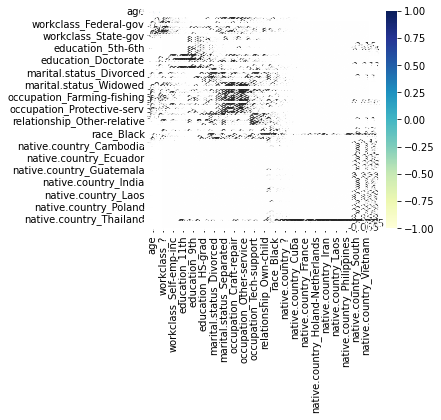

In [ ]:
import seaborn as sns

numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
corr_numeric = df[numeric_cols].corr()
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_categorical = pd.get_dummies(df[categorical_cols])
corr_categorical = df_categorical.corr()
corr_combined = pd.concat([corr_numeric, corr_categorical], axis=1)
sns.heatmap(corr_combined, cmap='YlGnBu', annot=True, square=True)

We also look at the distribution of the data, using pre one hot encoded dataframe

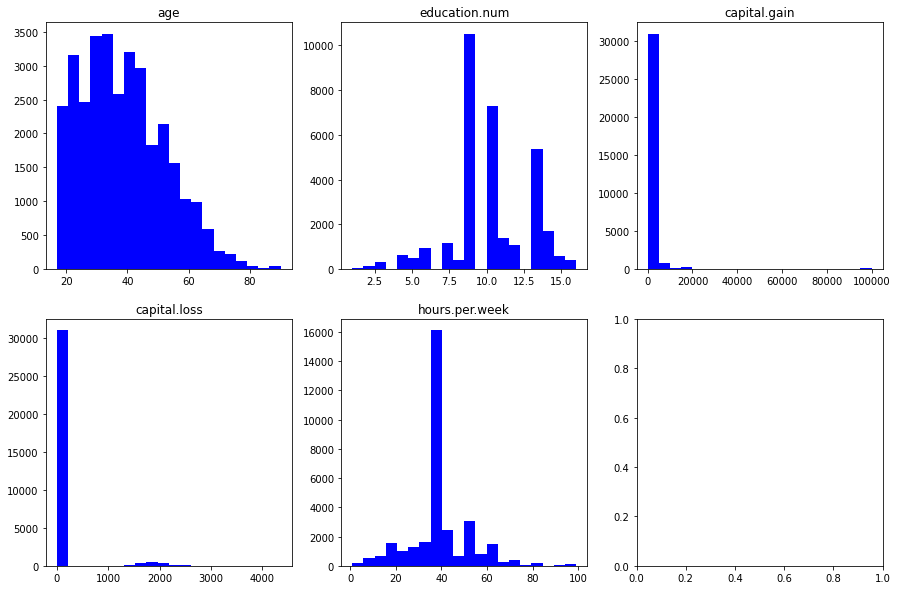

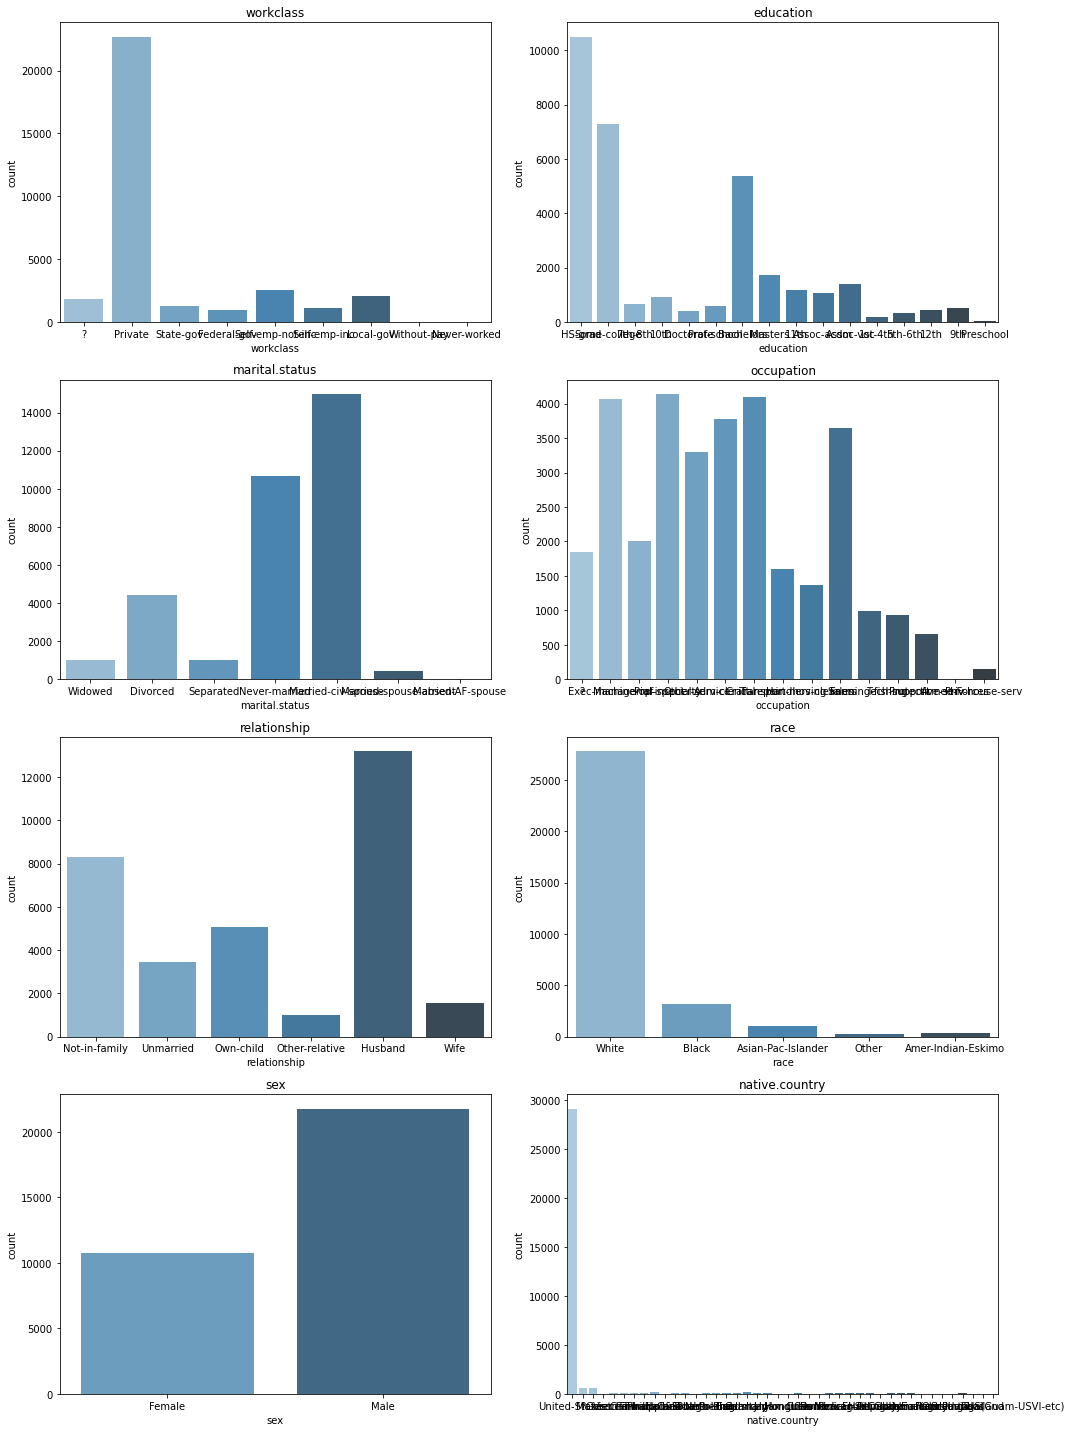

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Create histograms for all the numeric variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col], bins=20, color='blue')
    axs[i].set_title(col)
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Create count plots for all the categorical variables
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axs[i], palette='Blues_d')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

From the bar plots, we can see that the education number follows an approximately normal distribution. Age is skewed to the right, while most capital gain is between 0 to 20000 and most capital loss is 0, with some from about 1500 to 2500. Hours per week is approximately normal with most of the data working roughly 40 hours per week. Most of the workclass are private, about 50% of the data graduates high schoool or more, majority of the data are either married to civilian spouse or never married. The occupation of the data are pretty spread out across multiple occupations. Most of the data is white, and about 75% of the data are males. Most of the data are also have United States as their native country

Previous literature have suggested that age, sex, race, and education number contribute the most, we aim to explore the association between those and whether a person makes at least 50k. To see this, we converted the >= 50k to 1 and <=50 K to 0 in the income column. We also converted Female to 0 and Male to 1 in the Sex column, white, black, apac, other, amer-indian to 1,2,3,4,5 respectively in race. Note: We are using the pre-one hot encoded data

In [ ]:
df["income"] = df["income"].replace(['>50K', '<=50K'],[1, 0])
df['sex'] = df['sex'].replace(['Male', 'Female'], [1,0])
df['race'] = df['race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'], [1,2,3,4,5])

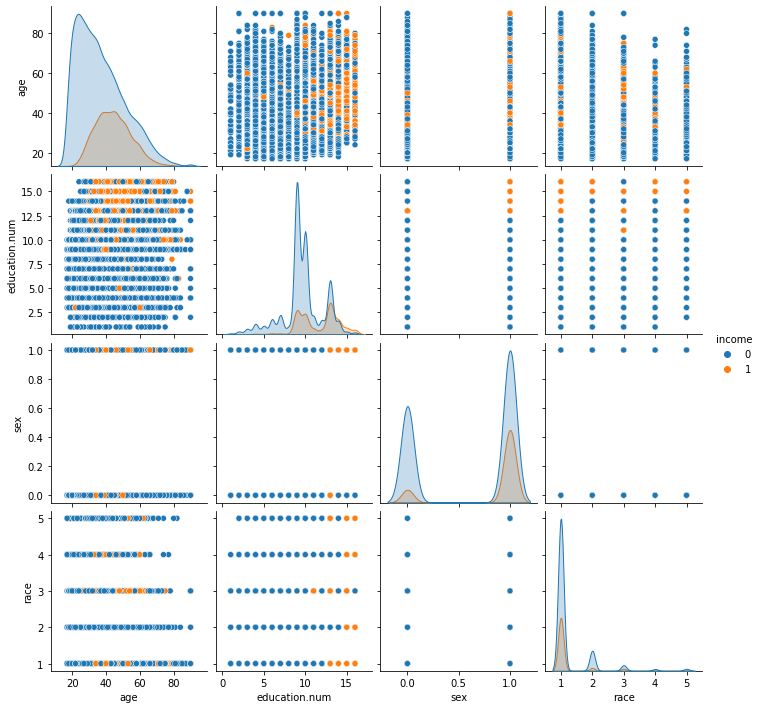

In [ ]:
scatter = df[['age', 'education.num', 'sex', 'race', 'income']]
sns.pairplot(scatter, hue="income")

From these graphs, we can see that as education number increases, there tends to be more data with >=50k. The other variables do not have quite the clear association.

We also created a correlational matrix. Note: Also using pre one-hot encoded data

In [ ]:
df.corr()

,age,fnlwgt,education.num,race,sex,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,-0.036219,0.088832,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.010265,0.026858,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,-0.037536,0.012280,0.122630,0.079923,0.148123,0.335154
race,-0.036219,-0.010265,-0.037536,1.000000,-0.066823,-0.008580,-0.018148,-0.032226,-0.066876
sex,0.088832,0.026858,0.012280,-0.066823,1.000000,0.048480,0.045567,0.229309,0.215980
capital.gain,0.077674,0.000432,0.122630,-0.008580,0.048480,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.018148,0.045567,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,-0.032226,0.229309,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,-0.066876,0.215980,0.223329,0.150526,0.229689,1.000000


None of the variables alone seeems to have high correlation with income

We also checked the percentage of data that had income over 50K



In [ ]:
num_greater_than_50k = (df['income'] == 1).sum()
total_records = df.shape[0]
percentage = (num_greater_than_50k / total_records) * 100
print("Percentage of records with income >50K:", percentage, "%")

Percentage of records with income >50K: 24.080955744602438 %


# Proposed Solution

In this project, we wil employ 4 different machine learning models: logistic regression, K Nearest Neighbor, Support Vector Machine, and Decision Tree. Therefore, the main python library that we would be using is SciKit-Learn and its various training algorithms. The main goal of using these models is to find the best model and the parameters that can best predict whether a person will make over 50k a year or not. With logistic regression, we can also infer which variable(s) influence the prediction the most. By discovering the characteristics of the data and the variable(s) that influence the prediction the most, we hope to apply some changes in those variables to help combat the inequality we see in the income of Americans. 



# Evaluation Metrics

An evaluation metric that we will use is recall, precision, and F-value. We expect there to not be as many people that make over 50000 a year as the median wage for 1994 was 16,118.02. Therefore, a model that simply always assigned a data point to the negative class would likely have a very high specificity and be correct most of the time. However, it would be a bad model. Our evaluation metrics will focus on testing whether the model correctly identifies the positive class. We will prioritize recall, as this will tell us how much of the positive class we are able to correctly identify. However, we will use precision to make sure that we are not incorrectly labeling too many points as positive. Therefore, we will seek a good F-value, prioritizing recall over precision. Below are the formulas to calculate each:

recall = TP/(TP + FN)

precision = TP/(TP + FP)

F-value = (2 * recall * precision)/(precision + recall)

TP = True positive, FN = False negative, FP = False positive
We will apply the confusion mateix to calculate the recall.
In addition, an ROC curve will be used.

# Train-Test Split






We are splitting our data set into 70% traning and 30% testing

In [9]:
# fnlwgt not relevant for model. 
#TODO: Should we take it into account? fnlwgt is not a variable important for predicting, but it could be important when evaluating the model
X = df2.drop(['income'], axis=1)

# Target variable
y = df2['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





# Logistic Regression

In [ ]:
def test_logistic_model(solver):
  logreg = LogisticRegression(max_iter=1000, solver=solver) # Can try different solvers
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)

  print("Solver:", solver.capitalize())

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred, labels=['<=50K', '>50K'])

  # Plot the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
  disp.plot()
  disp.ax_.set_title(solver.capitalize() + ' Confusion Matrix')
  plt.show()


  y_pred_proba = logreg.predict_proba(X_test)[:, 1]

  # Calculate the FPR and TPR
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='>50K')

  # Calculate the AUC
  auc_score = auc(fpr, tpr)

  # Plot the ROC curve
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(solver.capitalize() + ' ROC Curve')
  plt.legend(loc="lower right")
  plt.show()

  # Plot the Precision-Recall curve
  # Calculate the precision and recall
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='>50K')

  # Calculate the AUC
  auc_score = auc(recall, precision)

  # Plot the precision-recall curve
  plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % auc_score)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(solver.capitalize() + ' Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.show()

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label='>50K')
  precision = precision_score(y_test, y_pred, pos_label='>50K')
  f1 = f1_score(y_test, y_pred, pos_label='>50K')
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1 score:", f1)
  print('\n')


Solver: Liblinear


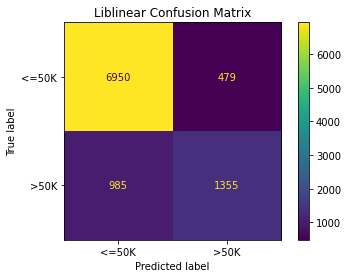

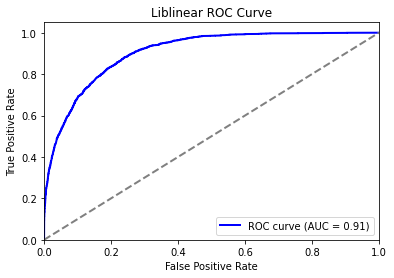

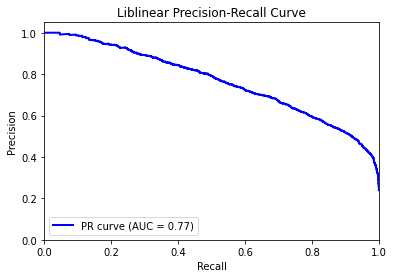

Accuracy: 0.8501381922407616
Recall: 0.5790598290598291
Precision: 0.7388222464558343
F1 score: 0.6492573071394345


Solver: Newton-cg


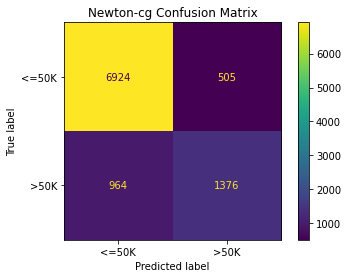

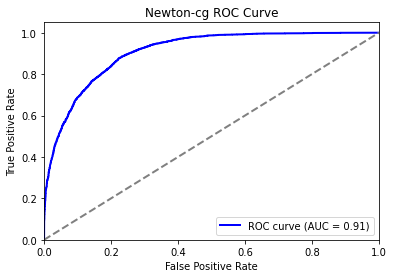

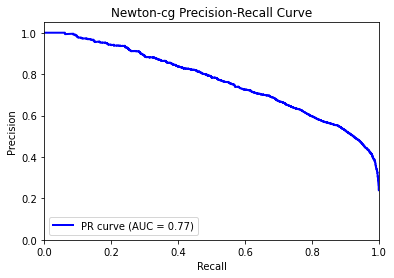

Accuracy: 0.8496263691268298
Recall: 0.588034188034188
Precision: 0.7315257841573631
F1 score: 0.6519782042170101


Solver: Sag


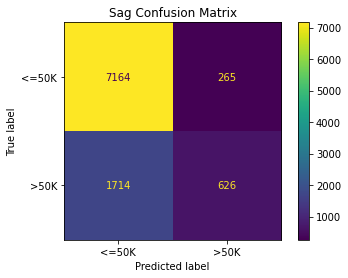

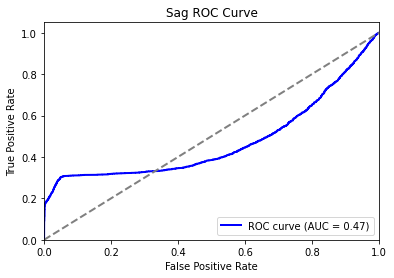

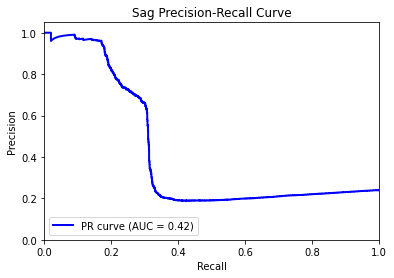

Accuracy: 0.7974204115057836
Recall: 0.2675213675213675
Precision: 0.7025813692480359
F1 score: 0.38749613122872173




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: Saga


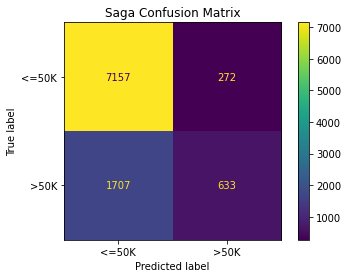

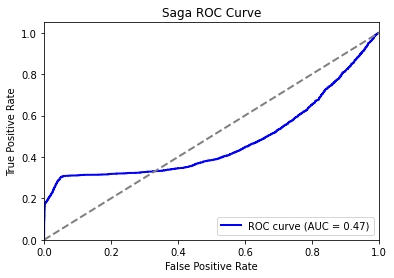

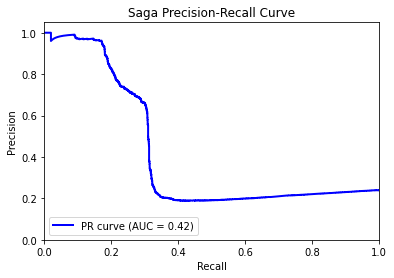

Accuracy: 0.7974204115057836
Recall: 0.2705128205128205
Precision: 0.6994475138121546
F1 score: 0.39013867488443754




In [ ]:
test_logistic_model(solver='liblinear')
test_logistic_model(solver='newton-cg')
test_logistic_model(solver='sag')
test_logistic_model(solver='saga')

Both newton-cg and liblinear have similar performances. Since newton-cg has the best recall, and F1-score, we will choose this as the best model. Chance would have a recall of 0.25. Our recall of 0.588 is significanlty better. Similarly, the AUC in the ROC curve is notably better than random performance (0.5). The precision-recall curve also demonstrates that our model does remarkably better than chance. 






In [ ]:
### START FEATURE
# If we need to say which features are most important 
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000, solver='newton-cg') # Can try different solvers
logreg.fit(X_train, y_train)

# create the RFE object and fit the model
rfe = RFE(logreg, n_features_to_select=5)  # select the 5 most important features
rfe.fit(X_train, y_train)

# print the ranking of each feature
print("Feature ranking:", rfe.ranking_)

# print the names of the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

print("Feature ranking:", rfe.ranking_)

### END FEATURE 

Feature ranking: [ 94  55 103 102  91 101  27  95  62  61  35  84  68  16  96  60  93   2
   1   5  59  54  70  71   1  73  80  63   1  72  67   1   1  66  31  40
  74  92  48  41  49   9  34  15  90  12   4  10  29  21  20  52  86  57
  17   3  85  22  26  76  79  99  77  23  38  83  39  43  32   6  44   7
  98  69  64  37  42  81  18  88 100  75  87  51  56  82  50  36  24  65
  58  11  33  19  25  28  45  78  14  53  47  97  89  13  46   8  30]
Selected features: Index(['education_5th-6th', 'education_Doctorate', 'education_Prof-school',
       'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse'],
      dtype='object')
Feature ranking: [ 94  55 103 102  91 101  27  95  62  61  35  84  68  16  96  60  93   2
   1   5  59  54  70  71   1  73  80  63   1  72  67   1   1  66  31  40
  74  92  48  41  49   9  34  15  90  12   4  10  29  21  20  52  86  57
  17   3  85  22  26  76  79  99  77  23  38  83  39  43  32   6  44   7
  98  69  64  37  42  81  18  88 1

In [ ]:
feature_ranks = dict(zip(X_train.columns, rfe.ranking_))
print("Feature ranking:")
for feature, rank in feature_ranks.items():
    print(f"{feature}: {rank}")

Feature ranking:
age: 94
education.num: 55
capital.gain: 103
capital.loss: 102
hours.per.week: 91
workclass_?: 101
workclass_Federal-gov: 27
workclass_Local-gov: 95
workclass_Never-worked: 62
workclass_Private: 61
workclass_Self-emp-inc: 35
workclass_Self-emp-not-inc: 84
workclass_State-gov: 68
workclass_Without-pay: 16
education_10th: 96
education_11th: 60
education_12th: 93
education_1st-4th: 2
education_5th-6th: 1
education_7th-8th: 5
education_9th: 59
education_Assoc-acdm: 54
education_Assoc-voc: 70
education_Bachelors: 71
education_Doctorate: 1
education_HS-grad: 73
education_Masters: 80
education_Preschool: 63
education_Prof-school: 1
education_Some-college: 72
marital.status_Divorced: 67
marital.status_Married-AF-spouse: 1
marital.status_Married-civ-spouse: 1
marital.status_Married-spouse-absent: 66
marital.status_Never-married: 31
marital.status_Separated: 40
marital.status_Widowed: 74
occupation_?: 92
occupation_Adm-clerical: 48
occupation_Armed-Forces: 41
occupation_Craft-rep

In [ ]:
for feature, weight in zip(selected_features, logreg.coef_[0]):
  print(feature, weight)

education_5th-6th 0.024610078207133006
education_Doctorate 0.2988025710850728
education_Prof-school 0.0003059366241545573
marital.status_Married-AF-spouse 0.0006546000393220342
marital.status_Married-civ-spouse 0.02750092565652992


# KNN

In [ ]:
#imports for knn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

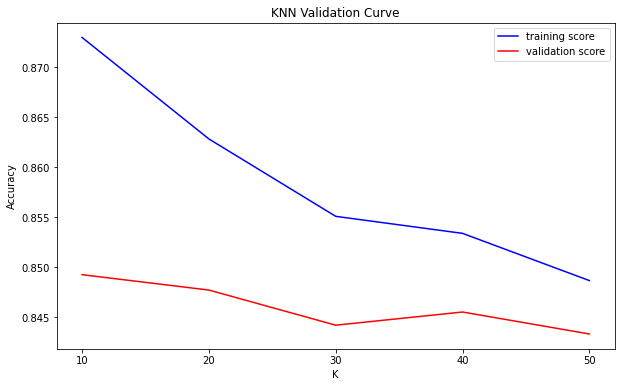

In [ ]:
k_range = [10,20,30,40,50]
train_scores, val_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, 
                                             param_name='n_neighbors', 
                                             param_range=k_range)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("KNN Validation Curve")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.plot(k_range, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(k_range, np.median(val_scores, 1), color='red', label='validation score')
plt.legend(loc="best")
plt.show()

The accuracy score for this model is: 0.8223973794656567
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      7429
        >50K       0.65      0.55      0.60      2340

    accuracy                           0.82      9769
   macro avg       0.76      0.73      0.74      9769
weighted avg       0.81      0.82      0.82      9769



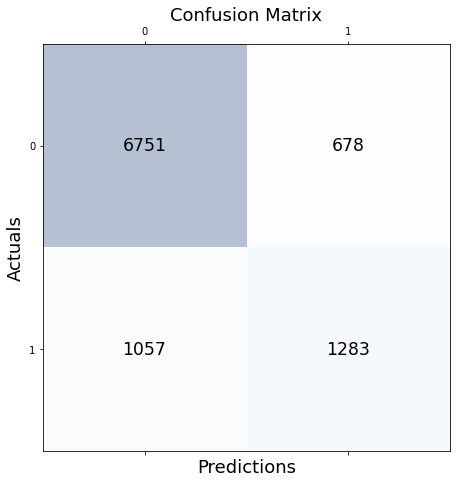

Recall: 0.5482905982905983
Precision: 0.6542580316165222
F1 score: 0.5966054405952105


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The accuracy score for this model is:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm2 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
recall = recall_score(y_test, y_pred, pos_label='>50K')
precision = precision_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')
print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

Area under the Receiver Operating Characteristic curve: 0.8527430329052351


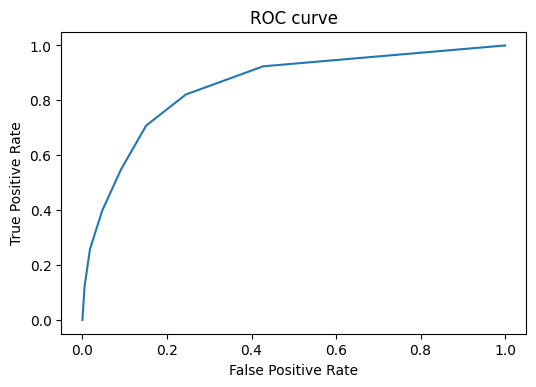

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y_encoded = l.fit_transform(y_test)

fpr = roc_curve(y_encoded, knn.predict_proba(X_test)[:,1])[0] # false positiv 
tpr = roc_curve(y_encoded, knn.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc = roc_auc_score(y_encoded, knn.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc)

Important features for KNN classification

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=3) # k specifies the number of top features to select
selector.fit(X_test, y_test)
X_selected = selector.transform(X_test)

knn.fit(X_selected, y_test)

# Print the importance of each feature
feature_importance = selector.scores_
top_feature_indices = selector.get_support(indices=True)

# Get the names of the top features
top_feature_names = [X.columns[i] for i in top_feature_indices]

# Print the name of the most important feature
top_feature_names

['education.num', 'marital.status_Married-civ-spouse', 'relationship_Husband']

From our application of SelectKBest to our KNN model, education number, marital status of Married civillian spouse, and being a husband to someone else appear to be the main feature of importance. This indicate that the more education someone has, and if they are a husband married to a civilian spouse, the higher chance the person has of making over 50k a year.

However, we can have a better model when selecting the hyperparameters. Therefore, we conducated a gridsearch on different hyperparmeter and select the best model.

Best param

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.874956124956125
Test set score: 0.8238304841846658


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
}
# create grid search
grid = GridSearchCV(pipe, parameters,scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'],
                    cv=5, n_jobs = -1, refit=False,verbose=0).fit(X_train, y_train)

In [ ]:
best_model = grid.fit(X_train, y_train)
# get the model with highest accuracy from grid search
p_accu = best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy']) ]
p_accu

{'classifier__n_neighbors': 19}

In [ ]:
# set the selected parameter to the pipeline
pipe.set_params(**p_accu)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier(n_neighbors=19))])

The accuracy score for the optimized model is 0.8284368922100522


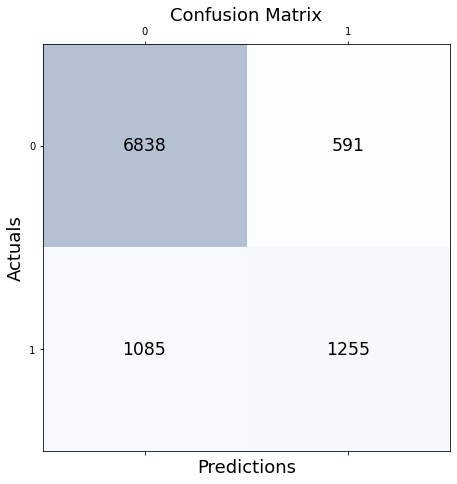

Area under the Receiver Operating Characteristic curve: 0.8676793876618887
Recall: 0.5363247863247863
Precision: 0.6798483206933911
F1 score: 0.599617773530817


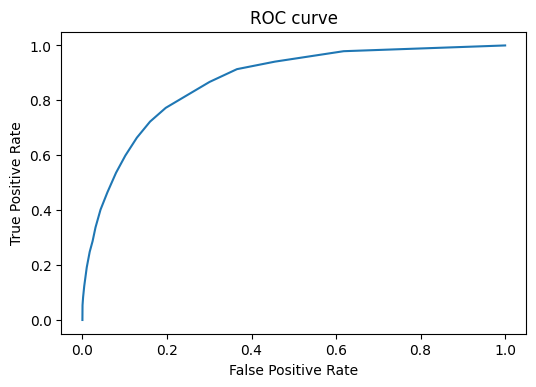

In [ ]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score2 = clf.score(X_test, y_test)
print("The accuracy score for the optimized model is", score2)
cm5 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm5, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm5.shape[0]):
    for j in range(cm5.shape[1]):
        ax.text(x=j, y=i,s=cm5[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='>50K')[0] # false positiv 
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='>50K')[1] # true positive 
roc_auc2 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# plotting the ROC curve after optimization
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc2)
recall = recall_score(y_test, y_pred, pos_label='>50K')
precision = precision_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')
print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

# Support Vector Machines Model

Due to the large magnitude of instances and features of the dataset. The training time of a support vector machines model was exceptional long (no responses after approximately 2 hours). Therefore, we pivoted our directions to a Linear support vector machines model as it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

To facilitate the training process, we decided to reduce the dimensionality of X and apply the Standardscaler as well.

In [ ]:
pca = PCA(n_components=100)

# Fit the PCA model on the data
pca.fit(X)

# Transform the data using the PCA model
X_pca = pca.transform(X)

scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X_pca)

# Transform the data using the scaler
X_scaled = scaler.transform(X_pca)

# Obtain new training and testing data
X_train_Lsvm, X_test_Lsvm, y_train_Lsvm, y_test_Lsvm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_Lsvm.shape

(22792, 100)

Let's define a test function to compare the strength of regularization terms on the performances of model.

In [ ]:
#linear support vector machines model
def LinearSVM_test(max_iter,C):
    #define a linear support vector machines model
    model = svm.LinearSVC(max_iter=max_iter,C=C)
    
    #fit the model on training data
    model.fit(X_train,y_train)
    
    #predict the outcomes based on test data of X
    y_pred=model.predict(X_test)
    
    #calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    #calculate the precision score
    precision = precision_score(y_test, y_pred,pos_label='>50K')
    
    #calculat the recall score
    recall = recall_score(y_test, y_pred,pos_label='>50K')
    
    #calculate the f1 score
    f1 = f1_score(y_test, y_pred,pos_label='>50K')
    
    print("\033[1m" + 'Regularization parameter:' + "\033[0m",C)
    print('accuracy:',accuracy)
    print('precision:',precision)
    print('recall:',recall)
    print('f1:',f1)
    print(' ')
    
    #plot a confusion matrix
    cm = confusion_matrix(y_test,y_pred,labels=['<=50K', '>50K'])
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print(' ')
    
    #calculate the predicted labels
    scores = model.decision_function(X_test)
    
    #calculate the false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label='>50K')
    
    #calculate the area under the curve
    my_auc = auc(fpr,tpr)
    
    #plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % my_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(' ')
    
    #plot the precision and recall curve
    precision, recall, thresholds = precision_recall_curve(y_test,scores,pos_label='>50K')
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    print(' ')

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 1
accuracy: 0.8516736615825571
precision: 0.7441095890410959
recall: 0.5803418803418804
f1: 0.6521008403361345
 


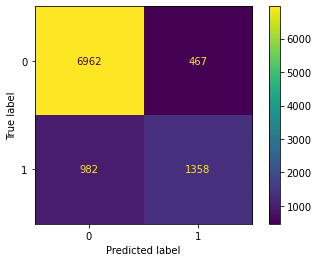

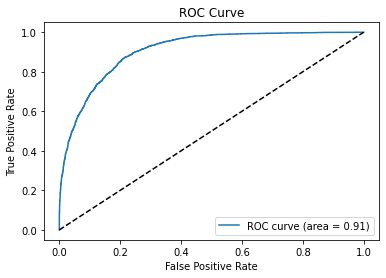

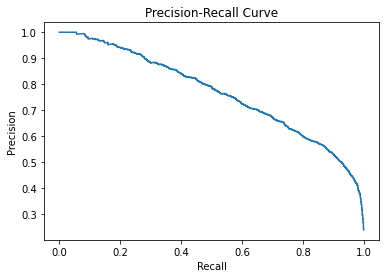

In [ ]:
## effect of different strength of regularization on model performance
LinearSVM_test(10000,1)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 10
accuracy: 0.8506500153546934
precision: 0.7400544959128066
recall: 0.5803418803418804
f1: 0.6505389221556886
 


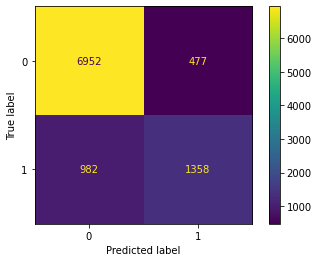

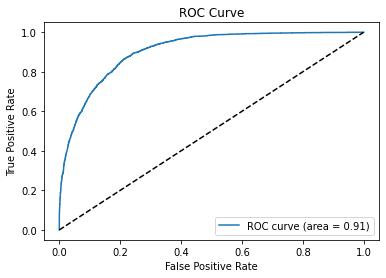

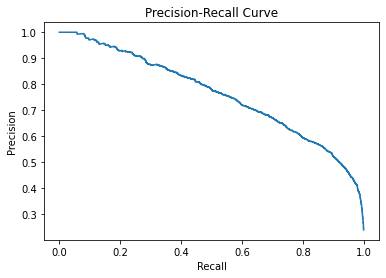

In [ ]:
LinearSVM_test(10000,10)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 100
accuracy: 0.8312007370252841
precision: 0.6606229660622966
recall: 0.6072649572649572
f1: 0.6328211979514585
 


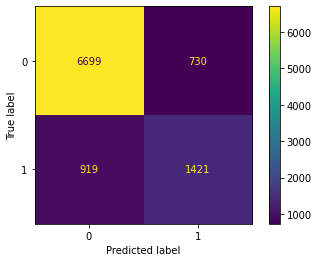

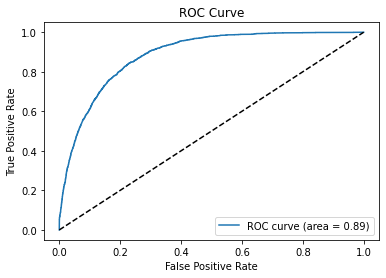

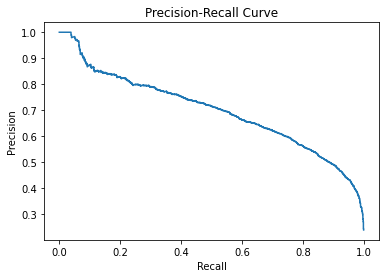

In [ ]:
LinearSVM_test(10000,100)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization parameter: 1000
accuracy: 0.7707032449585424
precision: 0.5150693188667872
recall: 0.7303418803418803
f1: 0.6041003888299752
 


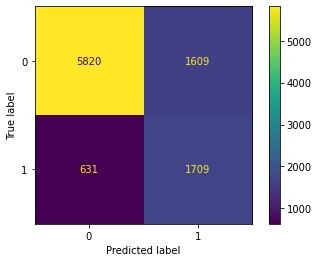

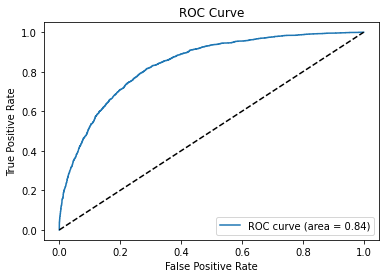

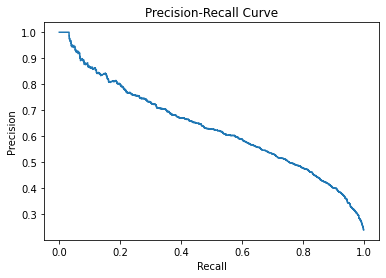

In [ ]:
LinearSVM_test(10000,1000)

Based on the results and graphs above, we could tentively conclude that the model with the strength of regularization parameter as 1 performs the best as it has the highest average value of accuracy, precision, recall, and f1 scores. In addition, its ROC curve covers 91% of the areas.

We would also like to pinpoint the top three features of the linearSVC model to select the best parameters. We would use the SelecKBest and f_classif packages to conduct this experiment.

In [ ]:

selector = SelectKBest(f_classif, k=3) # k specifies the number of top features to select
selector.fit(X_test, y_test)
X_selected = selector.transform(X_test)

model = svm.LinearSVC()
model.fit(X_selected, y_test)

# Print the importance of each feature
feature_importance = selector.scores_
top_feature_indices = selector.get_support(indices=True)

# Get the names of the top features
top_feature_names_1 = [X.columns[i] for i in top_feature_indices]

# Print the name of the most important feature
top_feature_names_1

['education.num', 'marital.status_Married-civ-spouse', 'relationship_Husband']

According to the reaults above, the top three features of the linearSVC model is ['education.num', 'marital.status_Married-civ-spouse', 'relationship_Husband']

In addition, we would like to perform a gridsearch,repeatedKfold, across all the hyperparameter Cs to evaluate the reliability of the results obtained from the graphs.

In [10]:
#initiate the values for hyperparameters
params = {'C':[1,10,100,1000]}

#create a repeatedKFold object
rkf = RepeatedKFold(n_splits=5,n_repeats=5,random_state=42)

#initiate a LinearSVC model
model=svm.LinearSVC()

#pass in the model, Cs, and rkf into the gridsearch object
grid_search = GridSearchCV(model,param_grid=params,cv=rkf,verbose=3)

#fit on the training data
grid_search.fit(X_train,y_train)

#view the Grid Search CV Results
grid_search.cv_results_

Fitting 25 folds for each of 4 candidates, totalling 100 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................................. C=1, score=0.829, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ................................. C=1, score=0.795, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.568, total=   1.5s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.767, total=   1.4s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.759, total=   1.3s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.780, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.831, total=   1.3s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.813, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.769, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.817, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.810, total=   1.5s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.802, total=   1.4s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.833, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.762, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.835, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.839, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.805, total=   1.0s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.835, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.767, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.774, total=   1.4s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.811, total=   1.4s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.844, total=   1.1s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.805, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.833, total=   1.2s
[CV] C=1 .............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................. C=1, score=0.771, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.823, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.840, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.794, total=   1.3s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.834, total=   1.4s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.801, total=   1.2s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.793, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.822, total=   1.2s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.839, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.801, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.795, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.784, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.776, total=   1.4s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.820, total=   1.4s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.624, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.625, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.759, total=   1.2s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.801, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.788, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.773, total=   1.1s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.774, total=   1.2s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.783, total=   1.3s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.819, total=   1.4s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.776, total=   1.2s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.799, total=   1.4s
[CV] C=10 ............................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ................................ C=10, score=0.815, total=   1.4s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.800, total=   1.4s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.750, total=   1.2s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.846, total=   1.3s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.843, total=   1.5s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.803, total=   1.3s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.796, total=   1.2s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.802, total=   1.1s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.606, total=   1.1s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.789, total=   1.5s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.806, total=   1.3s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.805, total=   1.1s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.797, total=   1.6s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.839, total=   1.5s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.823, total=   1.3s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.846, total=   1.3s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.754, total=   1.4s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.791, total=   1.2s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.426, total=   1.5s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.478, total=   1.3s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.820, total=   1.5s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.808, total=   1.6s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.836, total=   1.2s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.583, total=   1.2s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.831, total=   1.2s
[CV] C=100 ...........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.827, total=   1.3s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.828, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.596, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.767, total=   1.4s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.824, total=   1.4s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.769, total=   1.1s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.828, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.836, total=   1.4s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.612, total=   1.3s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.799, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.797, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.715, total=   1.4s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.789, total=   1.5s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.819, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.803, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.758, total=   1.1s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.453, total=   1.3s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.804, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.798, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.774, total=   1.3s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.768, total=   1.5s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.794, total=   1.3s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.807, total=   1.2s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.846, total=   1.3s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................. C=1000, score=0.787, total=   1.4s
[CV] C=1000 ..........................................................


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


[CV] .............................. C=1000, score=0.813, total=   1.2s


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'mean_fit_time': array([1.21630383, 1.19728926, 1.31444231, 1.25783559]),
 'std_fit_time': array([0.13689024, 0.13419769, 0.14361195, 0.1158859 ]),
 'mean_score_time': array([0.00888852, 0.00897496, 0.00970478, 0.00886632]),
 'std_score_time': array([0.00127656, 0.00108768, 0.0018591 , 0.00098103]),
 'param_C': masked_array(data=[1, 10, 100, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
 'split0_test_score': array([0.82934854, 0.82276815, 0.79995613, 0.82847116]),
 'split1_test_score': array([0.79469182, 0.84009651, 0.75016451, 0.59618337]),
 'split2_test_score': array([0.5675735 , 0.79420799, 0.84598508, 0.76722247]),
 'split3_test_score': array([0.76700307, 0.83413778, 0.84269416, 0.82382624]),
 'split4_test_score': array([0.75866608, 0.80122861, 0.80276437, 0.76941641]),
 'split5_test_score': array([0.77999561, 0.79315639, 0.79644659, 0.82847116]),
 'split6_test_

In [11]:
print(grid_search.cv_results_['mean_test_score'])
print(grid_search.cv_results_['rank_test_score'])

[0.79415405 0.78637122 0.76421291 0.76742912]
[1 2 4 3]


We are interested in the effect of nested cross validation on the selection of hyperparameters, so we are going to conduct a nested cross validation on the LinearSVM model.

In [12]:
# Create a pipeline with a feature selector and a linear SVM classifier
pipeline = Pipeline([
    ('selector', SelectKBest()),
    ('classifier', LinearSVC())
])

# Define the hyperparameters to search
param_grid = {'selector__k': [1, 2, 3,4], 'classifier__C': [1, 10, 100,1000]}

# Perform nested cross-validation using 5 outer and 3 inner folds
nested_scores = cross_val_score(GridSearchCV(pipeline, param_grid, cv=3), X_test, y_test, cv=5)

# Print the mean and standard deviation of the nested cross-validation scores
print("Nested CV score: %0.3f (+/- %0.3f)" % (nested_scores.mean(), nested_scores.std() * 2))

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are 

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value enco

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are 

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are 

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [13 80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value e

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80 99] a

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [13 80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid valu

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [75 80

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [75 80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] a

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80 99] a

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value enco

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value enco

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  8  80 102] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are 

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [13 80 93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid valu

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  8  80 

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  8  80 102] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [13 80 93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: inv

Nested CV score: 0.816 (+/- 0.014)


/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [13]:
print("Nested CV score: %0.3f (+/- %0.3f)" % (nested_scores.mean(), nested_scores.std() * 2))

Nested CV score: 0.816 (+/- 0.014)


# Decision Tree Model

In [ ]:
#function to evaluate models
def evaluate_dt(dt_clf):
  print("Train Accuracy :", accuracy_score(y_train, dt_clf.predict(X_train)))
  print("Train Recall :", recall_score(y_train, dt_clf.predict(X_train), pos_label = '>50K'))
  print("-"*50)
  print("Test Accuracy :", accuracy_score(y_test, dt_clf.predict(X_test)))
  print("Test Recall :", recall_score(y_test, dt_clf.predict(X_test), pos_label = '>50K'))
  print("Test Precision :", precision_score(y_test, dt_clf.predict(X_test), pos_label = '>50K'))
  print("Test F1-score :", f1_score(y_test, dt_clf.predict(X_test), pos_label = '>50K'))
  print("-"*50)
  print('Classification report on test set performance')
  print(classification_report(y_test, dt_clf.predict(X_test)))
  with sns.axes_style('white'):
    ConfusionMatrixDisplay.from_predictions(y_test, dt_clf.predict(X_test))

First, we will look at the metrics of a default decision tree. We can see that the tree overfits to the training data, with a training accuracy of 98% and a testing accuracy of 83%. As well as a training recall of 93% and testing recall of 61%.

Train Accuracy : 0.9806511056511057
Train Recall : 0.9340119978185785
--------------------------------------------------
Test Accuracy : 0.8277203398505476
Test Recall : 0.6175213675213675
Test Precision : 0.6471115091804747
Test F1-score : 0.6319702602230484
--------------------------------------------------
Classification report on test set performance
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      7429
        >50K       0.65      0.62      0.63      2340

    accuracy                           0.83      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769



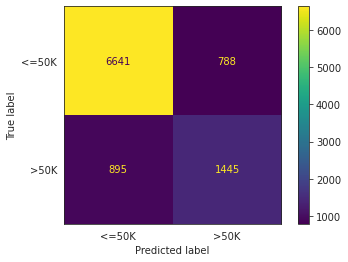

In [ ]:
#default tree
dt_default = DecisionTreeClassifier(random_state = 42)
dt_default.fit(X_train, y_train)

evaluate_dt(dt_default)

We use GridSearchCV to tune our hyperparameters and get a more stable model. From previous exploration, we know that the more depth the tree and the smaller the min_samples_split, then the more likely it will be to overfit. We previously saw this trend when testing max_depth = 20 and min_samples_split = 3.

In [ ]:
#grid seacrh
params = {'max_depth':[3,5,7,10],
          'min_samples_split':[5,8,10,15],
          'criterion':['gini','entropy'],}

# Define the scoring function as recall with positive label '>50K'
scorer = make_scorer(recall_score, pos_label='>50K')

grid_search = GridSearchCV(estimator=dt_default,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring=scorer)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [5, 8, 10, 15]},
             scoring=make_scorer(recall_score, pos_label=>50K), verbose=True)

According to the grid search, our best recall and most stable model will come from using criterion : 'gini', max_depth : '9', and min_samples_split : '8'.

In [ ]:
print('Best Parameters:', grid_search.best_params_, end='\n\n')
print('Best Score:', grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 15}

Best Score: 0.5882597638510445


# Results

## Logistic Regression

### Feasibility

The logistic regression model draws is a linear classifier with a probability output. Logistic Regression is more likely to overfit the data in higher dimensions because it uses gradient descent. There are more ways to split the data in higher dimensions. Therefore, we have to keep this tendency to overfit in mind when evaluating the model. 

### Performance 

In [ ]:
logistic_table = pd.DataFrame({'Solver':['liblinear','newton-cg','sag','saga'],
                                'Accuracy':[0.8501,0.8496,0.7974,0.7974],
                                'Precision':[0.7388,0.7315,0.7025,0.6994],
                                'Recall':[0.5791,0.5880,0.2675,0.2705],
                                'f1':[0.6492,0.6519,0.3874,0.3901]})
logistic_table

,Solver,Accuracy,Precision,Recall,f1
0,liblinear,0.8501,0.7388,0.5791,0.6492
1,newton-cg,0.8496,0.7315,0.5880,0.6519
2,sag,0.7974,0.7025,0.2675,0.3874
3,saga,0.7974,0.6994,0.2705,0.3901


The solver hyperparameter determines what to use when minimizing the loss function. newton-cg is the best logistic regression solver for our problem since it has the best recall and f1 score. newton-cg is good for medium datasets like ours. While liblinear is suitable for high-dimensional problems like ours, it still performs slightly worse than newton-cg. 

### Feature Selection

In [ ]:
for feature, weight in zip(selected_features, logreg.coef_[0]):
  print(feature, weight)

education_5th-6th 0.024610078207133006
education_Doctorate 0.2988025710850728
education_Prof-school 0.0003059366241545573
marital.status_Married-AF-spouse 0.0006546000393220342
marital.status_Married-civ-spouse 0.02750092565652992


Feature selection tells us which features are the most important in a model. The five most important features of the logistic regression model with newton-cg solver are shown above. The strongest correlation is having a doctorate. 5th-6th grade education has a low but very consistent correlation with >50k income.

## Linear Support Vector Machines

### Feasibility

The Linear Support Vector Machines model draws a linear decision boundary between the classes(<50k, >50k) we aim to classify in our dataset. It is suitable to tackle our problem since our daraset contains large numbers of attributes and observations. They can provide accurate predictions and are known for their excellent performance in high dimensional space. A linear support vector machines model is more appropriate than a conventional support vector machines model in this case due to its faster training time. They do not require the computation of the kernel matrix, which is a matrix that represents the similarity between all pairs of training data points. This matrix can be very large and computationally expensive to calculate for non-linear SVMs.

### Feature Selection

In [ ]:
top_feature_names_1

['education.num', 'marital.status_Married-civ-spouse', 'relationship_Husband']

Feature selection can help to improve model performance by reducing overfitting and increasing the generalization ability of the model. It can also reduce the computational complexity of the model by reducing the number of input features that need to be processed. This can help to speed up the training and prediction process, making the model more practical and efficient. Feature selection can improve the interpretability of the model by identifying the most important and informative features. This can help to provide insights into the underlying relationships between the input features and the target variable.Last but not least, Feature selection is particularly useful for high-dimensional data, where the number of input features is much larger than the number of data points. In such cases, feature selection can help to reduce the curse of dimensionality and improve the model's performance. In the context of the LinearSVM model, features such as **lengths of education**, **married couples**, and the **role of husband in a relationship** could help the model classify two classes the best. This is intuitive because individuals with all of these three labels or some of them are most likely to make more money than those who don't possess them. 

### Performance

In [ ]:
LinearSVM_table = pd.DataFrame({'Regularization parameter':['1','10','100','1000'],
                                'Accuracy':[0.8515,0.8504,0.8312,0.7707],
                                'Precision':[0.7441,0.7398,0.6606,0.5150],
                                'Recall':[0.5800,0.5803,0.6072,0.7303],
                                'f1':[0.6516,0.6505,0.6328,0.6041]})
LinearSVM_table

,Regularization parameter,Accuracy,Precision,Recall,f1
0,1,0.8515,0.7441,0.5800,0.6516
1,10,0.8504,0.7398,0.5803,0.6505
2,100,0.8312,0.6606,0.6072,0.6328
3,1000,0.7707,0.5150,0.7303,0.6041


The regularization parameter determines the amount of "slack" allowed in the optimization problem that is used to train the SVM. The slack variable allows for some misclassification of the training data points in order to create a wider margin. The regularization parameter controls the amount of slack allowed, and it affects the degree to which the SVM is sensitive to outliers or noise in the training data. When C is small, the SVM is more tolerant of misclassifications and allows for a wider margin. This can result in a simpler model that is less sensitive to the training data, but it may also increase the risk of overfitting to noise or outliers.When C is large, the SVM is less tolerant of misclassifications and tries to minimize the classification error on the training data, even if this results in a smaller margin. This can result in a more complex model that is more sensitive to the training data, but it may also decrease the risk of overfitting to noise or outliers. Based on the results obtained using different regularization parameters, we conclude that a default soft margin with C=1 performs the best. It has the highest accuracy score of **0.8515** ,precision score of **0.7441**, and f1 score of **0.6516**.

### Cross Validation

In [ ]:
RepeatedKFold_table = pd.DataFrame({'Regularization parameter':['1','10','100','1000'],
                                'Average_Accuracy_acorss_3trials':[0.780,0.760,0.765,0.754]})
RepeatedKFold_table

,Regularization parameter,Average_Accuracy_acorss_3trials
0,1,0.780
1,10,0.760
2,100,0.765
3,1000,0.754


Repeated k-fold cross-validation is a variant of k-fold cross-validation that involves repeating the k-fold process multiple times with different random splits of the data. The purpose of repeated k-fold cross-validation is to obtain a more reliable estimate of the performance of a machine learning model by averaging the results over multiple runs. After averaging the accuracies of models with different regularization strgenths of three trial runs, the model with C=1 is still ranked as number 1 for perforance with an accuracy of **0.780**. 

Nested cross-validation provides a more accurate estimate of model performance than traditional cross-validation techniques. This is because it accounts for both model selection and hyperparameter tuning in addition to the usual variance reduction benefits of cross-validation. According to the results above, the average nested cross validation acore across four hyperparameters is **0.817**.

## K-Nearest Neighbor

#### Feasability

KNN can be employed to predict value of new data by considering k nearest neighbors with multiple features, making KNN feasible for our dataset. KNN is also robusy to noisy features as it relies on the similarity between data points to make predictions. However, it should be noted that KNN may have limitation in high dimensional problem as it may be difficult to calculate the distance in each dimension.

### Feature Selection

In [ ]:
top_feature_names

['education.num', 'marital.status_Married-civ-spouse', 'relationship_Husband']

Feature selection tells us which features are the most important in a model. The three most important features of the KNN model  are shown above. The strongest correlation is being a husband and married to civilian spouse. In addition, the higher number of education you have, the more likely you are going to make over 50k.

### Performance

Without adjusting the model, we obtained an accuracy of **0.8223973794656567**, an ROC of **0.8527430329052351**, recall of 0.5487179487179488, F1 score of 0.5974872033503956. By selecting the hyperparameter with the best performance through a gridsearch, we obtained an accuracy of **0.8284368922100522**, an ROC of **0.8676793876618887**, recall of 0.5623931623931624 and F1 score of 0.6047794117647058

## Decision Tree

### Feasibility

Decision trees recursivley split data into smaller subsets based on Gini score. Because our dataset is medium sized with limited features, the decision tree is a good model to consider. Decision trees are also highly interpretable. One reason interpretability is valuable is feature selection; we can see which features the decision tree deems important for predicting target variables. Using plot_tree from sklearn.tree, we can see that the most important feature to the decision tree is whether or not a person is a married civilian (i.e. not in the armed forces). 

In [ ]:
#decision tree with best parameters
dt_grid_hyper = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 15)
dt_grid_hyper.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=15)

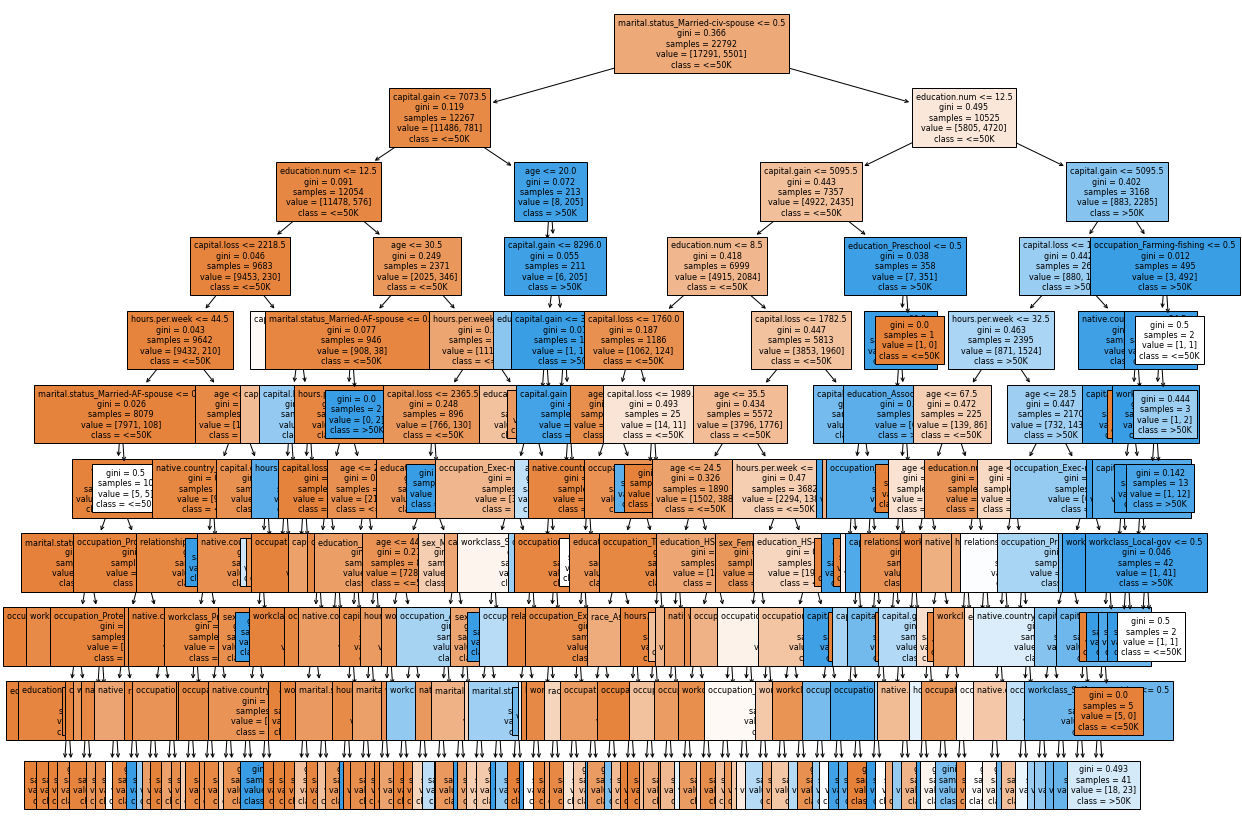

In [ ]:
from sklearn import tree
def dt_vis(dt_clf):
    fig = plt.figure(figsize=(20,15))
    _ = tree.plot_tree(dt_clf,
                       fontsize = 8,
                       feature_names=X.columns,
                       class_names=['<=50K', ">50K"],
                       filled=True)
dt_vis(dt_grid_hyper)

### Feature Selection

Looking more indepth at the feature selection of the decision tree, features with the highest importance score are: being a married to a civilian, education level, and captial gain. Importance score is calculated relative to the other features in the dataset, therefore our most impotant features are only relavant to our data set. A higher score is given to the feature that is a better predictor of the target variable (income) relative to the other features. Additionally, importance scores are associated with Gini scores. Gini scores aim for the best split of the data to reduce overall impurity of the tree. Lower impurity means less misclassification. 

In [ ]:
importances = dt_grid_hyper.feature_importances_

f_importances = list(zip(X.columns, importances))
f_importances.sort(key=lambda x: x[1], reverse = True)

n = 3 #n is the number of features we want to see

for i, (feature, importance) in enumerate(f_importances[:n]):
  print(f"{i+1}. {feature}: {importance}")

1. marital.status_Married-civ-spouse: 0.394062926040526
2. education.num: 0.20551081483186015
3. capital.gain: 0.18444708570574045


### Performance

The decision tree with no hyperparameter tuning gave a test accuracy, recall, and f1-score of 81%, 61%, and 63%. Although the metrics look fair, the tree was overfitting to the training data. After applying GridSearchCV, to find the most appropriate hyperparameters to optimize recall of the positive class (>50K), we were given:  criterion = 'gini', max_depth = '9', and min_samples_split = '8'. Building a tree with this criteria gave us a test accuracy, recall, and f1-score of 85%, 60%, and 67%. Despite recall being slightly lower than in the first tree, the current model is more stable and f1-score is higher. Unfortunately, recall is lower than accuracy, which can mean that the model is better at predicting the negative class (<=50K). In the classification report, we can see that the recall of the negative class is 94%. Overall, the model appears to have a reasonable performance, but the limitions of correctly identifying the the >50K should be considered and may require further optimization. 

Train Accuracy : 0.8686381186381187
Train Recall : 0.600799854571896
--------------------------------------------------
Test Accuracy : 0.8559729757395844
Test Recall : 0.5615384615384615
Test Precision : 0.7752212389380531
Test F1-score : 0.6513011152416357
--------------------------------------------------
Classification report on test set performance
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7429
        >50K       0.78      0.56      0.65      2340

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



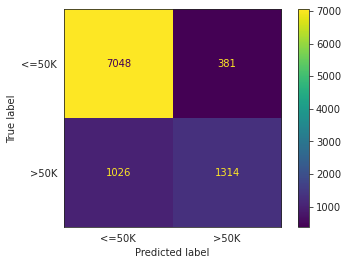

In [ ]:
evaluate_dt(dt_grid_hyper)

### Cross Validation

To assess the performance of the decision tree with tuned hyperparameters we will perform k-fold cross validation using KFold with n_splits = 5. We can see that we have an acceptable model with an average accuracy of 85% and a standard deviation of +/- 1%. As well as an average recall of 56% and a standard deviation of +/- 3%. Moreover, attempting to implement a nested cross validation proved to be computationally intensive. 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf_dt = KFold(n_splits=5, shuffle = True, random_state = 42)
scores_dt_acc = cross_val_score(dt_grid_hyper, X, y, cv = kf_dt)
scores_dt_recall = cross_val_score(dt_grid_hyper, X, y, scoring = scorer, cv = kf_dt)

In [ ]:
print(f"Average accuracy: {np.mean(scores_dt_acc):.2f} (+/- {np.std(scores_dt_acc):.2f})")
print(f"Average recall: {np.mean(scores_dt_recall):.2f} (+/- {np.std(scores_dt_recall):.2f})")

Average accuracy: 0.86 (+/- 0.00)
Average recall: 0.61 (+/- 0.05)


# Discussion

### Interpreting the results

In [ ]:
comparsion_table = pd.DataFrame({'Algorithms':['Logistic Regression','KNN','LinearSVM','Decision Tree'],
                                'Accuracy':[0.8497,0.8281, 0.8515,0.8525],
                                'Precision':[0.7315,0.6815,0.7436,0.7709],
                                'Recall':[0.5880,0.5303,0.6200,0.5952],
                                'f1':[0.6520,0.5965,0.6516,0.6717]})
comparsion_table

,Algorithms,Accuracy,Precision,Recall,f1
0,Logistic Regression,0.8497,0.7315,0.5880,0.6520
1,KNN,0.8281,0.6815,0.5303,0.5965
2,LinearSVM,0.8515,0.7436,0.6200,0.6516
3,Decision Tree,0.8525,0.7709,0.5952,0.6717


By employing logistic regression, KNN, SVM, and decision tree to predict if a person would make over 50k or not, the LinearSVM model has the best performance overall. Among all the features, features related to the amount of education and being married to civilian spouse seems to be the most important feature

### Why LinearSVM?

We chose linear SVM because it has the highest recall out of all the models. Similarly, its f1 score is similar to the logistic regression and decision tree models. We chose recall as the most important metric because our data is 25% positive. A model that always predicted a negative label would have a 75% accuracy, making it a less useful metric. Furthermore, since the amount of positive labels is smaller, we want to know how good our model is at detecting them. We also measured f1 score to take into account if a model predicts too many false positives.

### Nested Cross Validation/RepeatedKfolds

Since the accuracy score for the best parameter from the repeated k-fold is 0.78 and the mean accuracy score from the nested cross validation is 0.817, two results are similiar in terms of magnitude. The model is likely to be robust and its performance is stable across different train-test splits.

The fact that the performance of the model is consistent across different train-test splits obtained from the repeated k-fold validation suggests that the model is not overfitting to the training data. This is further supported by the use of nested cross-validation, which involves tuning the hyperparameters of the model to obtain a better estimate of its performance on unseen data.

Overall, if the results from both techniques are similar, it suggests that the LinearSVM model is a reliable and robust model that can generalize well to new data. It is important to note, however, that the performance of the model is only as good as the quality of the data used to train and evaluate it. Therefore, it is important to ensure that the data is of good quality and representative of the problem domain.

## Limitations

There are certain limitations of our project

Firstly, the grid-searches are not as complex since the complex models are extremely time consuming due to the exhaustive nature of grid search and the massive amount of data. Therefore, in our grid search we only used a few variables, it is very possible that the most optimizable set of hyperparameters were not included in our gridsearch across all models.

Secondly, we removed data containing missing values. It is possible that the data we decided to exclude could have altered the results.

Thirdly, the dataset was last updated in 1996, which means the data may not accurately reflect the current economic and social landscape. An example of this is seen in native country varialbe. Since 1996, there has been an increase number of immigrants, so today's data would not have almost all United States as the native country.

Lastly, the dataset is biased. An overwhelming amount of the data are white and are males, making this dataset not representative of the whole population.

## Ethics and Privacy

Possible ethics and privacy concerns during data collection can be informed consent and personally identifiable information exposure. To account for these issues people who participate in the census should be made aware that their information can be used for statistical research. Our dataset does not contain any names, identification numbers, or addresses; this reduces the possibility of personally identifiable information exposure. There is only enough information provided to draw a statistical model of the population. Additionally, because the census is a voluntary survey, collection bias, seen through nonresponse bias, is a big concern. Although the information provided by people cannot be used against them, certain communities (e.g. undocumented) may fear retaliation from the government if they participate. Other groups of people who may not respond are people who work multiple jobs, people in poverty, and people with no permanent address. Excluding their information from our model’s training will not give us predictive results with the population. Another issue that may arise during modeling may be proxy discrimination. Because race and sex will potentially be included as variables that predict income, we may model discrimination towards marginalized communities (e.g. people of color and women) who tend to work in lower paying industries.



## Conclusion

By using 4 machine learning models, we aimed to find the best model that best predict whether a person will make over 50k or not given the UCI adult dataset. We evaluated the performance based on f1 score and recall instead of accuracy as our dataset has 75% of the data making less than 50k, so a guess of all <50k would likely have 75% accuracy. Our results showed that linear SVM was the best model. We also found that the most important features in our prediction relates heavily to the amount of education and their marital status. 


## Extra Credit Justification

Utilizing advanced techniques such as feature selection, grid search, and nested cross-validation in machine learning models requires additional effort and expertise, but can lead to more accurate and robust models. Feature selection can help identify the most important features in a dataset, reducing noise and improving model performance. Grid search can help fine-tune hyperparameters, improving model generalization and performance. Nested cross-validation can help prevent overfitting and provide a more accurate estimate of model performance. By incorporating these techniques, we demonstrate a deeper understanding of the principles and methodologies behind machine learning, and show our commitment to producing high-quality and reliable results. As such, we believe that utilizing these advanced techniques warrants the extra credit, as it reflects a higher level of proficiency and expertise in the field of machine learning.

# Footnotes
<p id=”source1”> 1.<a href=”#note1”>^</a>: Social Security Administration. Measures Of Central Tendency For Wage Data.https://www.ssa.gov/oact/cola/central.html. Accessed 20 Feb. 2023. </p>
<p id=”source2”> 2.<a href=”#note2”>^</a>: Pew Research Center. Trends in income and wealth inequality. https://www.pewresearch.org/social-trends/2020/01/09/trends-in-income-and-wealth-inequality/. Accessed 20 Feb. 2023. </p>
<p id=”source3”> 3.<a href=”#note3”>^</a>: Strmic-Pawl, H. V., Jackson, B. A., & Garner, S. (2017). Race counts: Racial and ethnic data on the U.S. Census and the implications for tracking inequality. Sociology of Race and Ethnicity, 4(1), 1–13. https://doi.org/10.1177/2332649217742869 </p>
<p id=”source4”> 4.<a href=”#note4”>^</a>: Ross, N. A. (2000). Relation between income inequality and mortality in Canada and in the United States: Cross Sectional Assessment using census data and vital statistics. BMJ, 320(7239), 898–902. https://doi.org/10.1136/bmj.320.7239.898 </p>
<p id=”source5”> 5.<a href=”#note5”>^</a>: Waddington, David. “Census Bureau Statistics Measure Equity Gaps across Demographic Groups.” Census.gov, 10 June 2022, https://www.census.gov/library/stories/2021/09/understanding-equity-through-census-bureau-data.html. </p>
<p id="source6">6.<a href=”#note6”>^</a>: Gomez-Cravioto, D.A., Diaz-Ramos, R.E., Hernandez-Gress, N. et al. Supervised machine learning predictive analytics for alumni income. J Big Data 9, 11 (2022). https://doi.org/10.1186/s40537-022-00559-6 </p>
